In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

## 1.Data overview

In [3]:
train.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [4]:
test.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿


In [5]:
train.describe(include=['object','integer'])

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
count,1157,1157,1019,1157,1157.000000
unique,1156,1094,1019,1057,NaN
top,LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s,Shadrach Grentz,2014-10-24T06:05:07,Check out this video on YouTube:﻿,NaN
freq,2,5,1,52,NaN
mean,NaN,NaN,NaN,NaN,0.506482
std,NaN,NaN,NaN,NaN,0.500174
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [6]:
test.describe(include=['object','integer'])

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
count,799.000000,799,799,692,799
unique,NaN,799,760,692,733
top,NaN,z12tuvbodnn5ipp3o22mxnarfnnrxbq4z04,5000palo,2013-10-21T05:47:26.457000,Check out this video on YouTube:﻿
freq,NaN,1,3,1,45
mean,399.000000,NaN,NaN,NaN,NaN
std,230.795725,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,199.500000,NaN,NaN,NaN,NaN
50%,399.000000,NaN,NaN,NaN,NaN
75%,598.500000,NaN,NaN,NaN,NaN


Text(0.5,1,'Missing Values')

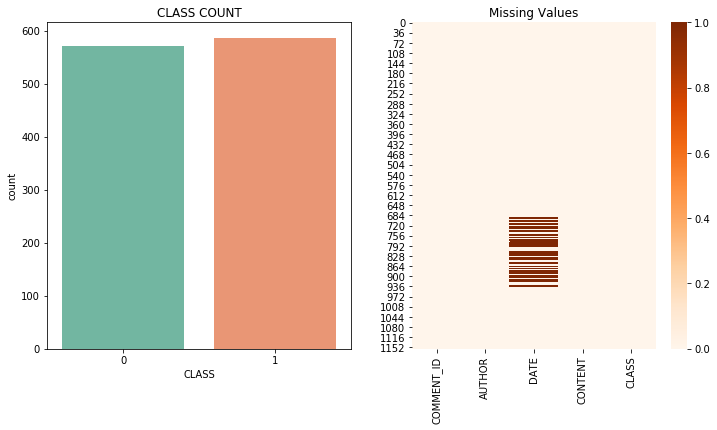

In [7]:
fig,ax= plt.subplots(1,2,figsize=(12,6))
sns.countplot(train.CLASS, palette='Set2', ax=ax[0])
ax[0].set_title('CLASS COUNT')
sns.heatmap(train.isnull(),cmap='Oranges',ax=ax[1])
ax[1].set_title('Missing Values')

Text(0.5,1,'Missing Values')

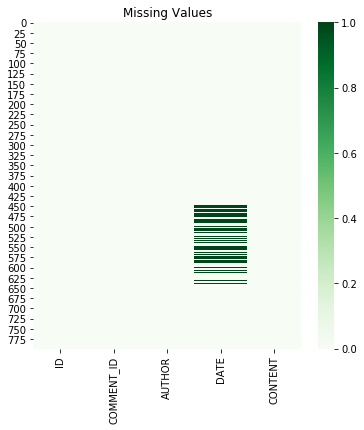

In [8]:
fig= plt.figure(figsize=(6,6))
sns.heatmap(test.isnull(),cmap='Greens')
plt.title('Missing Values')

#### From above exploration we can say Class is balanced therefore we don't have to worry about imbalanced problem

#### Both train and test dataset contains missing values. DATE columns in both train and test set must be handle properly

## Due to short timeline of competition i used tableau for EDA. Kindly check tableau file

## 2.Feature Engineering

In [9]:
# create column to check whether CONTENT column in dataset contain any Spam words -> spam_word column : 1 -> Yes , 2-> No
def extract(data):
    words=re.compile(r'check out|check me|card|search|dear|check my|buck|gift|check it|check this|dollar|[=+]|sub|channel|adf|instagram|share|follow|https://|[$]|please|money|free|www|facebook|fb|support|like this comment',re.IGNORECASE)
    data['spam_word']=data.CONTENT.str.contains(words)
    return data

In [10]:
# create column to check whether AUTHOR commented once or more than once -> MULTI_COMMENT : 1-> Yes , 2 -> No
def feature(data):
    data['MULTI_COMMENT'] = data['AUTHOR'] #to initialise multi_comments
    z=0
    for i in range(len(data)):
        for j in range(1,len(data)):
            if(data.iloc[i,1] == data.iloc[j,1]):
                z=z+1
        if(z>1):
            data.ix[i,'MULTI_COMMENT']=1
        else:
            data.ix[i,'MULTI_COMMENT']=0
        z=0
    return data

## 3. Data Preprocessing

### a) Handling Datetime index

In [11]:
# function to change index to datetime type and create several columns based on year/month of comments
def datetime(data):
    data=data.set_index('DATE')
    data.index=pd.to_datetime(data.index)
    data['year_2013']=data.index.year==2013
    data['year_2014']=data.index.year==2014
    data['year_2015']=data.index.year==2015
    data['mon_1']=data.index.month==1
    data['mon_2']=data.index.month==2
    data['mon_3']=data.index.month==3
    data['mon_4']=data.index.month==4
    data['mon_5']=data.index.month==5
    data['mon_6']=data.index.month==6
    data['mon_7']=data.index.month==7
    data['mon_8']=data.index.month==8
    data['mon_9']=data.index.month==9
    data['mon_10']=data.index.month==10
    data['mon_11']=data.index.month==11
    data['mon_12']=data.index.month==12
    return(data)

### b) Cleaning

In [12]:
# function to clean dataset
def cleaner(data):
    del data['CONTENT']
    del data['COMMENT_ID']
    del data['AUTHOR']
    x=data.columns
    for i in range(0,17):
        data[x[i]]=np.where(data[x[i]]==True,1,0)
    return data

In [13]:
# Feature engineering
trainset=extract(train)
trainset=feature(trainset)
testset=extract(test)
testset=feature(testset)

# Handling values (filling date time as 0)
trainset.dropna(inplace=True)
testset.fillna(0,inplace=True)

# Handling Datetime 
trainset=datetime(trainset)
trainset_label=trainset['CLASS']
del trainset['CLASS']
testset=datetime(testset)

# Cleaning Dataset
trainset=cleaner(trainset)
del testset['ID']
testset= cleaner(testset)

### c) Creating dummies

In [14]:
# Hot-1-encoding 
trainset=pd.get_dummies(trainset,drop_first=True)
testset=pd.get_dummies(testset,drop_first=True)

In [28]:
trainset['new'] = trainset['spam_word'] + trainset['MULTI_COMMENT']
trainset['new']=trainset.new.replace({2:1,1:0})
testset['new'] = testset['spam_word'] + testset['MULTI_COMMENT']
testset['new']=testset.new.replace({2:1,1:0})

In [29]:
trainset.shape, testset.shape

((1019, 18), (799, 18))

In [30]:
trainset.columns, testset.columns

(Index(['spam_word', 'MULTI_COMMENT', 'year_2013', 'year_2014', 'year_2015',
        'mon_1', 'mon_2', 'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8',
        'mon_9', 'mon_10', 'mon_11', 'mon_12', 'new'],
       dtype='object'),
 Index(['spam_word', 'MULTI_COMMENT', 'year_2013', 'year_2014', 'year_2015',
        'mon_1', 'mon_2', 'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8',
        'mon_9', 'mon_10', 'mon_11', 'mon_12', 'new'],
       dtype='object'))

## 4) Dimension Reduction  

In [31]:
from sklearn.decomposition import PCA
pca= PCA(n_components=8, whiten= False, random_state=187236)
pca.fit_transform(trainset)

array([[-0.57167641,  0.65633903, -0.08592209, ..., -0.53173983,
        -0.18203083, -0.1518569 ],
       [-0.57167641,  0.65633903, -0.08592209, ..., -0.53173983,
        -0.18203083, -0.1518569 ],
       [-0.57167641,  0.65633903, -0.08592209, ..., -0.53173983,
        -0.18203083, -0.1518569 ],
       ...,
       [-0.08679884,  0.3711578 ,  0.92595232, ..., -0.49832968,
         0.54441629,  0.17401494],
       [-0.08679884,  0.3711578 ,  0.92595232, ..., -0.49832968,
         0.54441629,  0.17401494],
       [-0.08679884,  0.3711578 ,  0.92595232, ..., -0.49832968,
         0.54441629,  0.17401494]])

In [32]:
sum(pca.explained_variance_ratio_)

0.9065270119410276

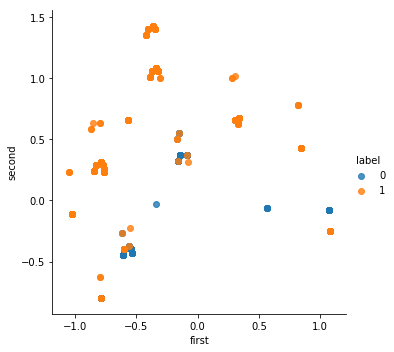

In [33]:
pca_df=pd.DataFrame(pca.fit_transform(trainset),index=trainset.index)
pca_df=pca_df.iloc[:,0:2]
pca_df=pd.concat([pca_df,trainset_label],axis=1)
pca_df.columns=['first','second','label']
sns.lmplot(x='first',y='second', hue='label',data=pca_df, fit_reg=False)


## Part3: Predictive Modeling

### Splittting data into test and train set

In [34]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(trainset, trainset_label, test_size=0.30,
                                             stratify=trainset_label,random_state=218768763)

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [37]:
def CrossVal(dataX,dataY,mode,cv=10):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [38]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

### SGD

Accuracy is :  0.9593114241001566


Text(0.5,1,'F1 Score = 0.9442379182156135')

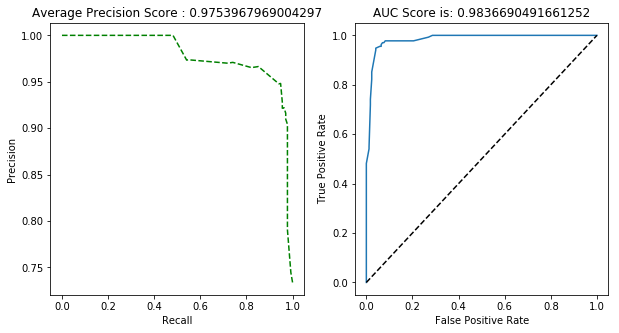

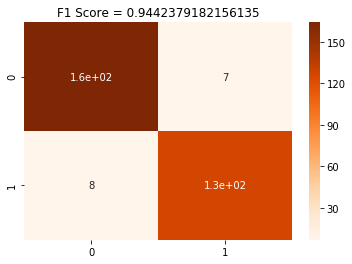

In [39]:
sgd=SGDClassifier(tol=1e-15, random_state=98723,loss='log')
score_sgd=CrossVal(Xtrain,Ytrain,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(Xtrain,Ytrain)
plotting(Ytest,sgd.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,sgd.predict(Xtest)), annot= True, cmap='Oranges')
sgd_f1=f1_score(Ytest,sgd.predict(Xtest))
plt.title('F1 Score = {}'.format(sgd_f1))

### b) K-Nearest Neighbors

Accuracy is :  0.955105633802817


Text(0.5,1,'F1 Score = 0.9288389513108615')

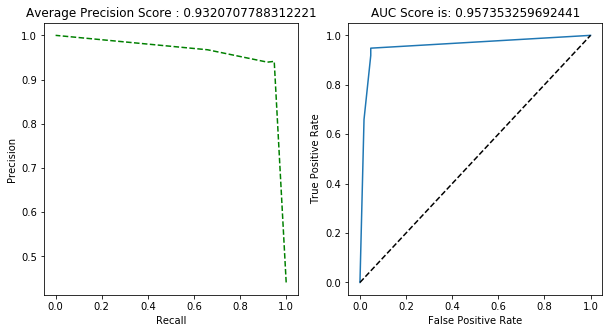

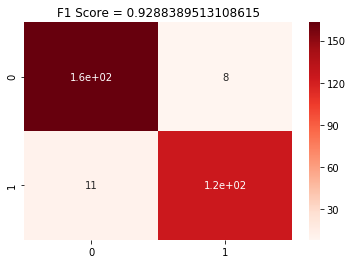

In [40]:
k=KNeighborsClassifier(algorithm='auto', n_neighbors= 3)
score_k=CrossVal(Xtrain,Ytrain,k)
print("Accuracy is : ",score_k)
k.fit(Xtrain,Ytrain)
plotting(Ytest,k.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,k.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,k.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

# Logistic

Accuracy is :  0.9621087636932707


Text(0.5,1,'F1 Score = 0.9442379182156135')

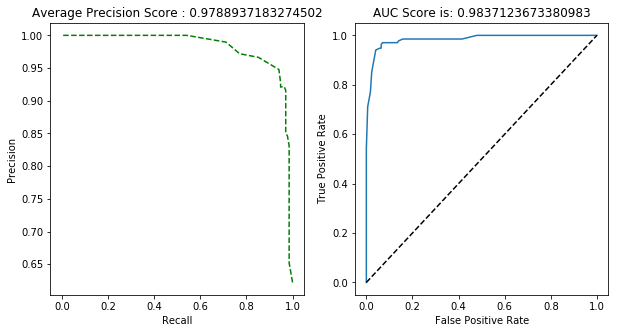

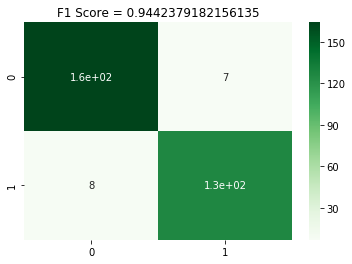

In [41]:
lr=LogisticRegression(class_weight='balanced', tol=1e-15)
score_lr=CrossVal(Xtrain,Ytrain,lr)
print("Accuracy is : ",score_lr)
lr.fit(Xtrain,Ytrain)
plotting(Ytest,lr.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,lr.predict(Xtest)), annot= True, cmap='Greens')
lr_f1=f1_score(Ytest,lr.predict(Xtest))
plt.title('F1 Score = {}'.format(lr_f1))

## decision tree

Accuracy is :  0.9607394366197184


Text(0.5,1,'F1 Score = 0.9407407407407408')

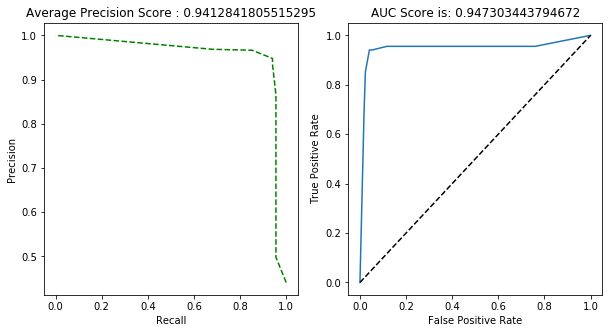

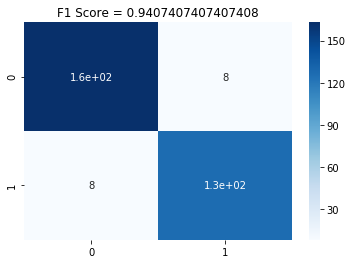

In [42]:
dtc=DecisionTreeClassifier()
score_dtc=CrossVal(Xtrain,Ytrain,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(Xtrain,Ytrain)
plotting(Ytest,dtc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,dtc.predict(Xtest)), annot= True, cmap='Blues')

dtc_f1=f1_score(Ytest,dtc.predict(Xtest))
plt.title('F1 Score = {}'.format(dtc_f1))

### e) Support vector machine

Accuracy is :  0.9607394366197184


Text(0.5,1,'F1 Score = 0.9442379182156135')

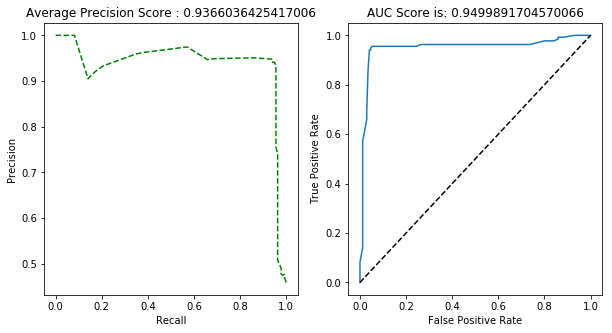

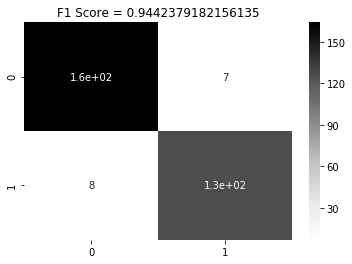

In [43]:
svc=SVC(C=20,probability=True,kernel='rbf',gamma=0.1)
score_svc=CrossVal(Xtrain,Ytrain,svc)
print("Accuracy is : ",score_svc)
svc.fit(Xtrain,Ytrain)
plotting(Ytest,svc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,svc.predict(Xtest)), annot= True, cmap='Greys')
svc_f1=f1_score(Ytest,svc.predict(Xtest))
plt.title('F1 Score = {}'.format(svc_f1))

### f) Random Forest Classifier

Accuracy is: 0.9635367762128325


Text(0.5,1,'F1 Score = 0.9407407407407408')

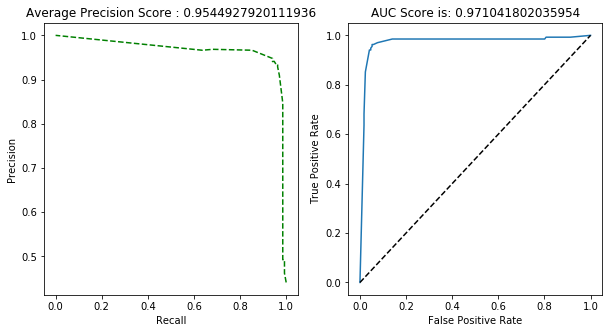

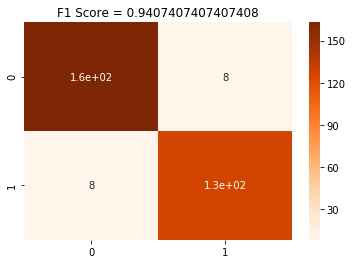

In [44]:
rf=RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=125796)
score_rf= CrossVal(Xtrain,Ytrain,rf)
print('Accuracy is:',score_rf)
rf.fit(Xtrain,Ytrain)
plotting(Ytest,rf.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)), annot= True, cmap='Oranges')

rf_f1=f1_score(Ytest,rf.predict(Xtest))
plt.title('F1 Score = {}'.format(rf_f1))

### g) Extra Trees Classifier

Accuracy is: 0.9635367762128325


Text(0.5,1,'F1 Score = 0.9407407407407408')

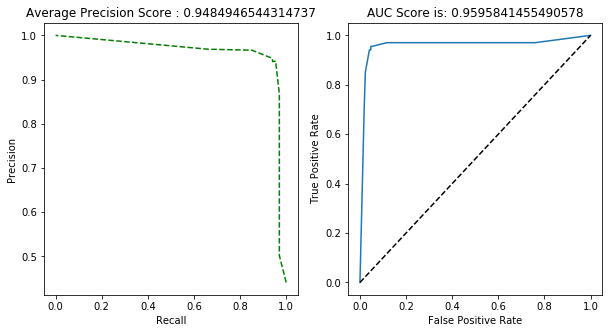

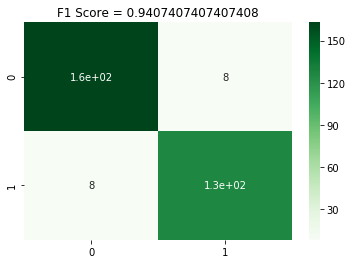

In [45]:
etc=ExtraTreesClassifier(n_estimators=500, n_jobs=-1, random_state=9845)
score_etc= CrossVal(Xtrain,Ytrain,etc)
print('Accuracy is:',score_etc)
etc.fit(Xtrain,Ytrain)
plotting(Ytest,etc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,etc.predict(Xtest)), annot= True, cmap='Greens')

etc_f1=f1_score(Ytest,etc.predict(Xtest))
plt.title('F1 Score = {}'.format(etc_f1))

### h) Ada Boost Classifier

Accuracy is: 0.9621087636932707


Text(0.5,1,'F1 Score = 0.9442379182156135')

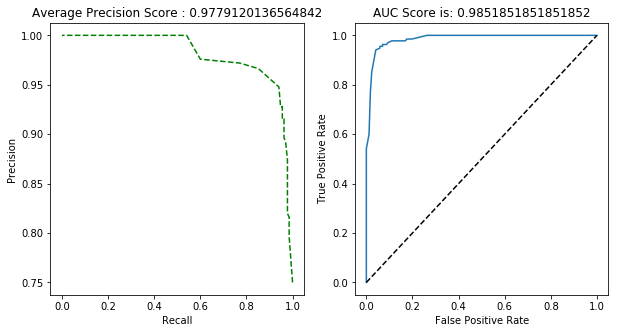

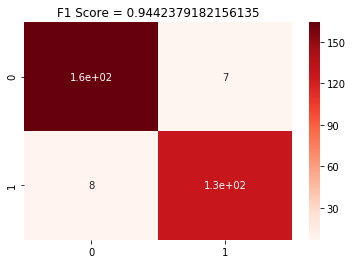

In [46]:
abc=AdaBoostClassifier(sgd,n_estimators=500, random_state=890,algorithm='SAMME.R', learning_rate=0.01)
score_ada= CrossVal(Xtrain,Ytrain,abc)
print('Accuracy is:',score_ada)
abc.fit(Xtrain,Ytrain)
plotting(Ytest,abc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,abc.predict(Xtest)), annot= True, cmap='Reds')

abc_f1=f1_score(Ytest,abc.predict(Xtest))
plt.title('F1 Score = {}'.format(abc_f1))

### i) Gradient Boosting Classifier 

Accuracy is: 0.9621283255086072


Text(0.5,1,'F1 Score = 0.9442379182156135')

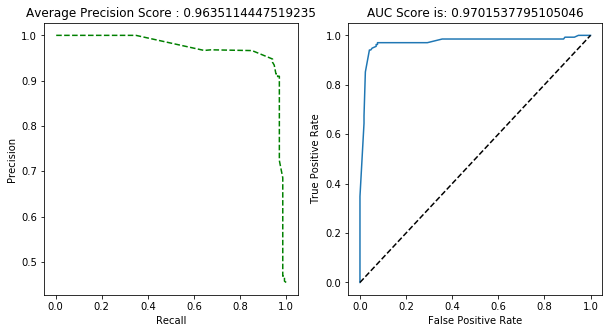

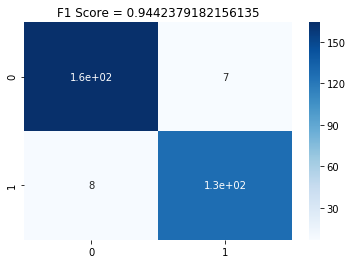

In [47]:
gbc=GradientBoostingClassifier(n_estimators=500, random_state=987, learning_rate = 0.01)
score_gbc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(Xtrain,Ytrain)
plotting(Ytest,gbc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,gbc.predict(Xtest)), annot= True, cmap='Blues')

gbc_f1=f1_score(Ytest,gbc.predict(Xtest))
plt.title('F1 Score = {}'.format(gbc_f1))

### j) Bagging Classifier 

Accuracy is: 0.9621283255086072


Text(0.5,1,'F1 Score = 0.9442379182156135')

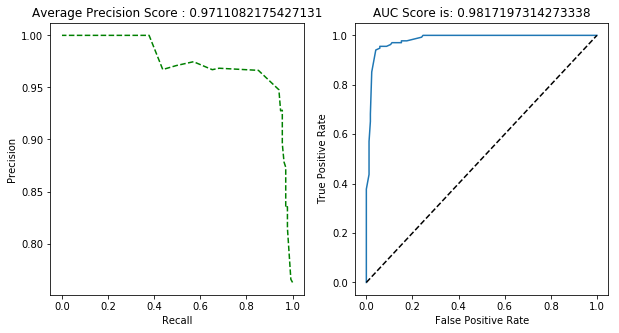

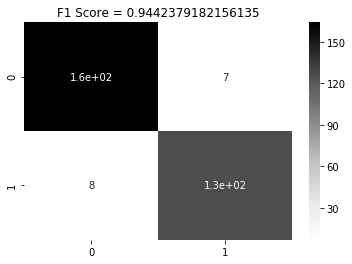

In [48]:
bc=BaggingClassifier(lr,max_samples=31, bootstrap=True, n_jobs= -1, )
score_bc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_bc)
bc.fit(Xtrain,Ytrain)
plotting(Ytest,bc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,bc.predict(Xtest)), annot= True, cmap='Greys')

bc_f1=f1_score(Ytest,bc.predict(Xtest))
plt.title('F1 Score = {}'.format(bc_f1))

### Voting Classifier

Accuracy is: 0.959330985915493


Text(0.5,1,'F1 Score = 0.9442379182156135')

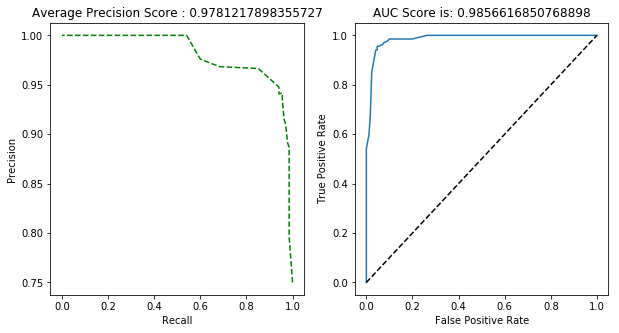

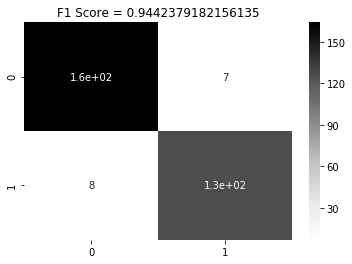

In [49]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(voting='soft', estimators=[('bg',bc),('abc',abc),('svm',svc)])
score_vc= CrossVal(Xtrain,Ytrain,vc)
print('Accuracy is:',score_vc)
vc.fit(Xtrain,Ytrain)
plotting(Ytest,vc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,vc.predict(Xtest)), annot= True, cmap='Greys')

vc_f1=f1_score(Ytest,vc.predict(Xtest))
plt.title('F1 Score = {}'.format(vc_f1))

In [50]:
import lightgbm as lgb

In [51]:
param = {'bagging_fraction': 0.7516888665358554,
  'feature_fraction': 0.9553537756833577,
  'lambda_l1': 0.0010944748423031836,
  'lambda_l2': 0.0954432971019934,
  'max_depth': 9,
  'min_data_in_leaf': 18,
  'min_gain_to_split': 0.012314142199287075,
  'num_leaves': 14,
    'metric':'auc',
        'objective':'binary',
        'booster':'gbdt'}

In [52]:
data_1=lgb.Dataset(Xtrain,Ytrain)
data_2=lgb.Dataset(Xtest,Ytest,reference=data_1)
best=lgb.train(param, train_set=data_1, valid_sets=data_2, num_boost_round=10000, early_stopping_rounds=400)

[1]	valid_0's auc: 0.965086
Training until validation scores don't improve for 400 rounds.
[2]	valid_0's auc: 0.965151
[3]	valid_0's auc: 0.961902
[4]	valid_0's auc: 0.961902
[5]	valid_0's auc: 0.961902
[6]	valid_0's auc: 0.961902
[7]	valid_0's auc: 0.961902
[8]	valid_0's auc: 0.961902
[9]	valid_0's auc: 0.961902
[10]	valid_0's auc: 0.961902
[11]	valid_0's auc: 0.961902
[12]	valid_0's auc: 0.961902
[13]	valid_0's auc: 0.961902
[14]	valid_0's auc: 0.961902
[15]	valid_0's auc: 0.961902
[16]	valid_0's auc: 0.961902
[17]	valid_0's auc: 0.961902
[18]	valid_0's auc: 0.961902
[19]	valid_0's auc: 0.961902
[20]	valid_0's auc: 0.961902
[21]	valid_0's auc: 0.961902
[22]	valid_0's auc: 0.961902
[23]	valid_0's auc: 0.961902
[24]	valid_0's auc: 0.960321
[25]	valid_0's auc: 0.960321
[26]	valid_0's auc: 0.960321
[27]	valid_0's auc: 0.962227
[28]	valid_0's auc: 0.963483
[29]	valid_0's auc: 0.963483
[30]	valid_0's auc: 0.963808
[31]	valid_0's auc: 0.963808
[32]	valid_0's auc: 0.963808
[33]	valid_0's auc

In [53]:
best.best_score

defaultdict(dict, {'valid_0': {'auc': 0.977821095949751}})

In [54]:
pd.DataFrame(rf.feature_importances_,index=Xtrain.columns).sort_values(ascending=False, by=0)

,0
spam_word,0.803205
mon_5,0.079331
MULTI_COMMENT,0.017750
year_2015,0.017488
new,0.017381
mon_8,0.010077
year_2014,0.008723
year_2013,0.008362
mon_2,0.005911
mon_1,0.005585


#### Since ADA Boost performing better than any other ML algo therefore we will use Ada boost classifier to classify testset

In [55]:
prediction=vc.predict(testset)
output=pd.DataFrame({'ID':range(0,799), 'CLASS':prediction})
output.to_csv('answer_ada.csv',index=False)